In [1]:
#Importing imp libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
%matplotlib inline

C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#Reading files

In [28]:
train=pd.read_csv('train.csv')

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
test=pd.read_csv('test.csv')

In [31]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
gender_sub=pd.read_csv('gender_submission.csv')

In [33]:
gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [35]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [36]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [37]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [38]:
passenger_id=test['PassengerId']

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
train.set_index(['PassengerId'],inplace=True)
test.set_index(['PassengerId'],inplace=True)

In [41]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [44]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [45]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [46]:
def data_cleaning(train):
    train['Age']=train['Age'].fillna(train['Age'].median())
    train['Fare']=train['Fare'].fillna(train['Fare'].median())
    train['Embarked']=train['Embarked'].fillna('S')
    
    train.loc[train['Sex']=='male','Sex']=1
    train.loc[train['Sex']=='female','Sex']=0
    train.loc[train['Embarked']=='S','Embarked']=0
    train.loc[train['Embarked']=='C','Embarked']=1
    train.loc[train['Embarked']=='Q','Embarked']=2
    
    return train

In [47]:
train_data=data_cleaning(train)
test_data=data_cleaning(test)

In [48]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0


In [49]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,2
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0
894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,2
895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0


In [50]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [51]:
test_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [52]:
#Exploratory Data Analysis

In [53]:
#Generates descriptive statistics that summarizes the central tendency
train_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [54]:
#Group survived
train_data.groupby('Survived').mean()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,
0,2.531876,0.852459,30.028233,0.553734,0.329690,22.117887,0.307832
1,1.950292,0.318713,28.291433,0.473684,0.464912,48.395408,0.447368


In [55]:
#groupby SEx
train_data.groupby('Sex').mean()

#About the survival rate ,only 31% passengers survived during that tragedy
#About the survival rate for genders,only 74% female passengers and 19% male passengers survived during that tragedy

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
Sex,,,,,,,
0,0.742038,2.159236,27.929936,0.694268,0.649682,44.479818,0.461783
1,0.188908,2.389948,30.140676,0.429809,0.235702,25.523893,0.306759


In [56]:
#correlation Matrix and heatmap
train_data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.116569
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,-0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


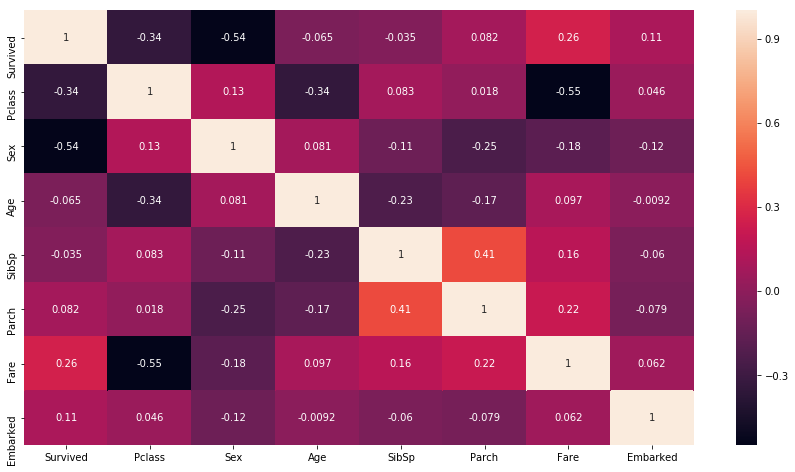

In [58]:
#HEATMAP
plt.subplots(figsize=(15,8))
sns.heatmap(train.corr(),annot=True)

In [59]:
#POSITIVE CORRELATION FEATURES :
#fare and survived 0.26
#passenger who pay more fare rate of survival is more

In [61]:
#NEGATIVE CORRELATION FEATURES
#FARE AND PCLASS -0.55
#GENDER AND SURVIVED -0.54
#PCLASS AND SURVIVED -0.34

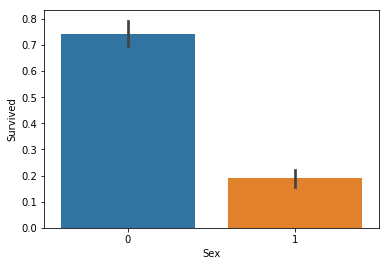

In [62]:
#SEX AND SURVIVED
#Females of survived more than males
sns.barplot(x='Sex',y='Survived',data=train_data)

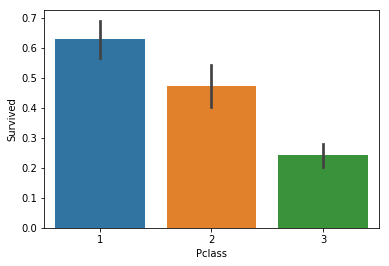

In [64]:
#Pclass and Survived
#1st class people have survived most and 3rd class is least 

sns.barplot(x='Pclass',y='Survived',data=train_data)

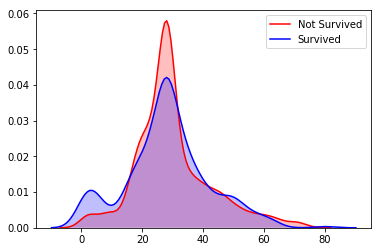

In [67]:
#age and survived

sns.kdeplot(train_data.loc[(train['Survived']==0),'Age'],color='r',shade=True,Label='Not Survived')
sns.kdeplot(train_data.loc[(train['Survived']==1),'Age'],color='b',shade=True,Label='Survived')

In [ ]:
#Feature Engineering

In [69]:
train_data['family_size']=train_data['SibSp']+train_data['Parch']+1

In [71]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,2
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1


In [75]:
def family_group(size):
    a=''
    if(size<=1):
        a='alone'
    elif (size<=4):
        a='small'
    else:
        a='large'
    return a
train_data['family_group']=train_data.family_size.map(family_group)

In [76]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_group
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,2,small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,2,small
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,2,small
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1,alone


In [79]:
#categories the age
def age_group(age):
    a=''
    if (age<=1):
        a='infant'
    elif (age<=4):
        a='toddler'
    elif (age<=14):
        a='child'
    elif (age<=15):
        a='teenager'
    elif (age<=25):
        a='young_adult'
    elif (age<=40):
        a='adult'
    elif (age<=55):
        a='middle_age'
    else:
        a='old'
    return a
train_data['age_group']=train_data['Age'].map(age_group)

In [80]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_group,age_group
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,2,small,young_adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,2,small,adult
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,alone,adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,2,small,adult
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1,alone,adult


In [81]:
train_data['fare_per_person']=train_data['Fare']/train_data['family_size']

In [82]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_group,age_group,fare_per_person
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,2,small,young_adult,3.62500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,2,small,adult,35.64165
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,alone,adult,7.92500
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,2,small,adult,26.55000
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1,alone,adult,8.05000


In [83]:
def fare_group(fare):
    a=''
    if(fare<=4):
        a='very_low'
    elif (fare<=10):
        a='low'
    elif (fare<=20):
        a='mid'
    elif (fare<=45):
        a='high'
    else:
        a='very_high'
    return a
train_data['fare_group']=train_data.fare_per_person.map(fare_group)

In [84]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_group,age_group,fare_per_person,fare_group
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,2,small,young_adult,3.62500,very_low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,2,small,adult,35.64165,high
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,alone,adult,7.92500,low
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,2,small,adult,26.55000,high
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1,alone,adult,8.05000,low


In [ ]:
#Creating dummy variable

In [86]:
train_data=pd.get_dummies(train_data,columns=['Embarked','family_group','age_group','fare_group'],drop_first=True)

In [88]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,age_group_infant,age_group_middle_age,age_group_old,age_group_teenager,age_group_toddler,age_group_young_adult,fare_group_low,fare_group_mid,fare_group_very_high,fare_group_very_low
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,0,0,0,1,0,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,0,0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,0,0,1,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,0,0,0,0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,...,0,0,0,0,0,0,1,0,0,0


In [89]:
#drop columns
train_data.drop(['Name','Ticket','Fare','Age','fare_per_person','family_size'],axis=1,inplace=True)

In [90]:
train_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked_1,Embarked_2,family_group_large,family_group_small,...,age_group_infant,age_group_middle_age,age_group_old,age_group_teenager,age_group_toddler,age_group_young_adult,fare_group_low,fare_group_mid,fare_group_very_high,fare_group_very_low
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,1,1,0,NaN,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,1,1,0,1,0,C85,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,3,0,0,0,NaN,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,1,0,C123,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,3,1,0,0,NaN,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [113]:
predictor_Vars=['Sex','Age','SibSp','Parch','Fare']

In [93]:
#Separate predictors and target
x,y=train[predictor_Vars],train.Survived

In [94]:
#First five rows
x.iloc[:5]

,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,1,22.0,1,0,7.2500
2,0,38.0,1,0,71.2833
3,0,26.0,0,0,7.9250
4,0,35.0,1,0,53.1000
5,1,35.0,0,0,8.0500


In [95]:
y.iloc[:5]

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [96]:
#Lets initialize the Random Forest model and choose model parameters if you want

In [97]:
modelRandom=RandomForestClassifier(max_depth=3)

In [98]:
#lets do the 5 fold crossvalidation
modelRandomCV=cross_validation.cross_val_score(modelRandom,x,y,cv=5)

In [99]:
modelRandomCV

array([0.81005587, 0.82681564, 0.80898876, 0.76966292, 0.83050847])

In [100]:
modelRandom

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [101]:
#lets see the same information on the plot

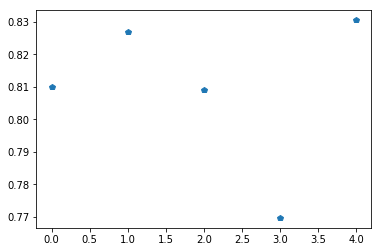

In [102]:
plt.plot(modelRandomCV,'p')

In [103]:
#Lets check mean model accuracy of all five folds

In [104]:
print(modelRandomCV.mean())

0.8092063336698836


In [105]:
#lets nnow fit the model with the same parameter on the whole dataset instead of 4/5th part of data set as we did in crossvalidation

In [106]:
modelRandom=RandomForestClassifier(max_depth=3)
modelRandom.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [107]:
prediction=modelRandom.predict(test[predictor_Vars])
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [111]:
temp=pd.DataFrame(pd.DataFrame({
    'PassengerId':passenger_id,
    'Survived':prediction
}))

In [112]:
temp.to_csv('submission.csv',index=False)